# Inventory Organizational Content

Being able to retrieve, display, analyze, and export the content within an organization Portal are important tasks for any admin. Here we will leverage the [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager) and [UserManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#usermanager) classes of the GIS module, as well as some functionality from the [Pandas](https://pandas.pydata.org/docs/index.html) library, to accomplish those tasks.

In this page we are going to observe how the following can be accomplished:
- [Import Libraries](#Import-Libraries)
- [Connect to ArcGIS Online](#Connect-to-ArcGIS-Online)
- [Querying Content](#Querying-Content)
    - [Searching for Content](#Searching-for-Content)
    - [Displaying Content](#Displaying-Content)
    - [Sorting Content](#Sorting-Content)
- [Querying Organization Content](#Querying-Organization-Content)
    - [Searching for Organization Members](#Searching-for-Organization-Members)
    - [Getting Member Content](#Getting-Member-Content)
    - [Compiling Organization Content](#Compiling-Organization-Content)
- [Analyzing Organization Content with Pandas](#Analyzing-Organization-Content-with-Pandas)
    - [Filtering the Dataset](#Filtering-the-Dataset)
    - [Accessing Content by ID](#Accessing-Content-by-ID)
- [Exporting Data](#Exporting-Data)

## Import Libraries

In [1]:
import pandas as pd
from IPython.display import display

import arcgis
from arcgis.gis import GIS

## Connect to ArcGIS Online

In [3]:
profile_name = "my_dev_profile"

gis = GIS(profile=profile_name)
gis.users.me

<User username:api_data_owner>

## Querying Content

To search for content within our organization, we can access the [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager) class via `gis.content()`. 

Using the [`advanced_search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) method, we can query content belonging to a user by providing the string `"owner: < username >"`. By setting the `return_count` parameter of `advanced_search()` to `True`, we can simply return a single integer representing the number of items which that user owns.

Let's return the number of items that belong to the user currently logged in:

In [4]:
qe = f"owner: {gis.users.me.username}"
my_content_count = gis.content.advanced_search(query=qe,return_count=True)
print(my_content_count, 'items found for current user')

1240 items found for current user


### Searching for Content

If we leave the `return_count` parameter as its default value `False`, then we will receive a response dictionary containing metadata about the query as well as a list of returned items in the `results` field.

By setting the `max_items` parameter, we can limit the number of items that are returned in the `results` field.

In [5]:
max_items = 3
user_content = gis.content.advanced_search(query=qe, max_items=max_items)
user_content

{'query': 'owner: api_data_owner',
 'total': 1240,
 'start': 1,
 'num': 3,
 'nextStart': 4,
 'results': [<Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>,
  <Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>,
  <Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>]}

### Displaying Content

<Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>
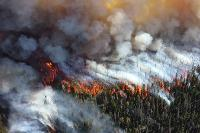

<Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>
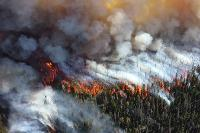

<Item title:" Exposing patterns in land fires around the globe " type:StoryMap owner:api_data_owner>
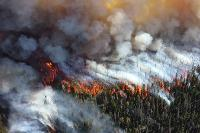

In [6]:
# Displaying the result items through IPython.display.display()

for item in user_content['results']:
    display(item)

It is also possible to have these items returned as dictionary objects by setting the `as_dict` parameter:

In [7]:
# return items as a dictionary with as_dict=True

user_content_as_dict = gis.content.advanced_search(
    query=qe, max_items=max_items,as_dict=True)
user_content_as_dict['results']

[{'id': 'f1b6a842fbea45bca693c2fe6622bf70',
  'owner': 'api_data_owner',
  'created': 1610462632000,
  'isOrgItem': True,
  'modified': 1610462693000,
  'guid': None,
  'name': None,
  'title': ' Exposing patterns in land fires around the globe ',
  'type': 'StoryMap',
  'typeKeywords': ['arcgis-storymaps',
   'smdraftresourceid:draft_1599006014540.json',
   'smpublisheddate:1599006014535',
   'smstatuspublished',
   'smversiondraft:20.35.0',
   'smversionpublished:20.35.0',
   'source-0f5ef7b723cd410f8e4e298d716bcd73',
   'StoryMap',
   'Web Application'],
  'description': "For decades, the NASA satellites Aqua and Terra have been monitoring potential wildfires with their MODIS sensors. In this StoryMap, I delve into the data archives to look at spatial and temporal patterns and trends.<div><br /></div><div>The\xa0<a href='https://storymaps.arcgis.com/stories/5985c0af444c4fbbb53b92a1bf880503' rel='nofollow ugc' target='_blank'>original StoryMap</a>\xa0has been translated into German, 

### Sorting Content

The `sort_field` and `sort_order` parameters of the [`advanced_search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) method can be used to sort the returned content server side.

Possible values for `sort_order` are `"asc"` for ascending or increasing order and `"desc"` for descending or decreasing order. Default values for the `sort_field` and `sort_order` parameters are `"title"` and `"asc"`, respectively.

In this next example we'll search for the last 3 items that the current user modified by setting `sort_field="modified"` and `sort_order="desc"`:

<Item title:"Model Builder for Mussel Farm Detection" type:Geoprocessing Sample owner:api_data_owner>
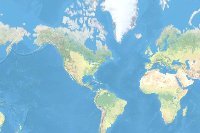

<Item title:"MusselFarms" type:Feature Layer Collection owner:api_data_owner>
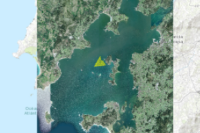

<Item title:"MusselFarms" type:Service Definition owner:api_data_owner>
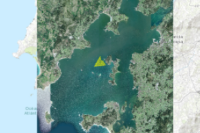

In [8]:
content_last_modified = gis.content.advanced_search(
    query=qe, max_items=max_items, sort_field="modified", sort_order="desc")

for item in content_last_modified['results']:
    display(item)

Here we return the first 3 items that the user created by setting `sort_field="created"` and `sort_order="asc"`:

<Item title:"Seattle Bike Routes" type:Service Definition owner:api_data_owner>
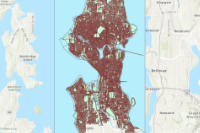

<Item title:"Seattle Bike Routes" type:Feature Layer Collection owner:api_data_owner>
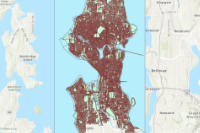

<Item title:"collisions" type:Shapefile owner:api_data_owner>

In [9]:
content_first_created = gis.content.advanced_search(query=qe, max_items=max_items, sort_field="created", sort_order="asc")

for item in content_first_created['results']:
    display(item)

## Querying Organization Content

### Searching for Organization Members

We can search for a list of the members within the organization by using the [UserManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.server.html#arcgis.gis.server.UserManager) class within the GIS module. Here we access the UserManager by calling `gis.users`, and use the [`search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.search) method to return a list of organization members. The `search()` method will return all users in the organization if no parameters are provided:

In [10]:
# View UserManager object
gis.users

<UserManager @ https://geosaurus.maps.arcgis.com>

In [11]:
org_users = gis.users.search()
print(f'{len(org_users)} users found')
org_users[:3]

42 users found


[<User username:achapkowski_geosaurus>,
 <User username:amani_geosaurus>,
 <User username:andrew57>]

<User username:amani_geosaurus>
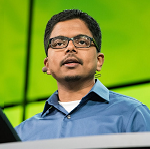

In [12]:
# Display a misc member
org_member = org_users[1]
org_member

### Getting Member Content

Similarly to above, we can set `return_count=True` and see how many items this user has:

In [13]:
# See the number of member items
qe = "owner: " + org_member.username
member_content_count = gis.content.advanced_search(
    query=qe, max_items=-1, return_count=True)
print(f"Org member has {member_content_count} items")

Org member has 24 items


In [14]:
# Return <max_items> items from member
max_items = 3

member_content = gis.content.advanced_search(query=qe, max_items=max_items)
member_content['results']

[<Item title:"Demo Initiative1" type:Hub Site Application owner:amani_geosaurus>,
 <Item title:"Demo Initiative1" type:Hub Initiative owner:amani_geosaurus>,
 <Item title:"geotaggedphotos1" type:Feature Layer Collection owner:amani_geosaurus>]

### Compiling Organization Content

If we return all items for each user in the organization, we can compile those items into a single list representing all of the organizations content.

We can remove the item limit for each query by setting `max_items=-1` in the `advanced_search()` function:

In [15]:
# return content for each user in org, compile into a single list

org_content = []

for user in org_users:
    qe = f"owner: {user.username}"
    user_content = gis.content.advanced_search(query=qe, max_items=-1)['results']
    org_content += user_content
    
print(f"{len(org_content)} items found in org")

1848 items found in org


## Analyzing Organization Content with Pandas

Let's put our compiled list into a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to easily view and filter our data

In [16]:
# Create DataFrame

content_df = pd.DataFrame(org_content)
content_df.head()

,id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,size,ownerFolder,commentsEnabled,itemControl,layers,tables,appProxies,protected,contentStatus,sourceUrl
0,8ec563a6886f474c8d991e7748ab4c03,amani_geosaurus,1558567624000,True,1558567631000,None,None,Demo Initiative1,Hub Site Application,"[Hub, hubSite, hubSolution, JavaScript, Map, M...",...,95654.0,None,True,update,NaN,NaN,NaN,NaN,NaN,NaN
1,d1d2876870ab422488e425db4c400361,amani_geosaurus,1558567621000,True,1558567632000,None,None,Demo Initiative1,Hub Initiative,"[Hub, hubInitiative, OpenData]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72567bd147fd478da9563bc56b434870,amani_geosaurus,1634162116000,True,1634162156000,None,geotaggedphotos1,geotaggedphotos1,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6fd3252f1ad044869dd4f949ea4b20cc,amani_geosaurus,1555049137000,True,1555049257000,None,None,hu_indy_18p,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1d3614ec5cc24382878533f8454c24a3,amani_geosaurus,1630112960000,True,1630112990000,None,1d3614ec5cc24382878533f8454c24a3.ipynb,intro to notebooks,Notebook,"[Notebook, Python]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use the pandas function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) to see how many occurrences there are of each value for a particular column. Here we return the top 10 most frequently occurring item types and the number of instances they have:

In [17]:
# use value_counts() to see how many items you have with a particular key:value pair
content_df.type.value_counts().head(10)

Feature Service          435
Feature Collection       429
Notebook                 342
Shapefile                129
StoryMap                  98
Service Definition        76
Image Collection          65
File Geodatabase          43
Deep Learning Package     43
Web Map                   33
Name: type, dtype: int64

Another [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) example where we see the distribution of access levels for each of the items in the organization:

In [18]:
content_df.access.value_counts()

private    815
org        518
public     513
shared       2
Name: access, dtype: int64

Using the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) function in conjunction with the [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) operation allows for an additional level of analysis. Here we see the breakdown of item types that each user has created:

In [19]:
content_df.groupby('owner').type.value_counts().head(10)

owner                type                
ArcGISPyAPIBot       Notebook                31
                     Feature Service          4
                     CSV                      1
                     StoryMap                 1
                     Web Map                  1
DavidJVitale         Feature Service          1
                     Web Map                  1
MMajumdar_geosaurus  Hub Site Application     1
amani_geosaurus      Feature Service          6
                     Notebook                 4
Name: type, dtype: int64

In [20]:
# Viewing the number item types per access level within the org
content_df.groupby('type').access.value_counts().head(10)

type             access 
API Key          private    1
Application      public     1
CSV              public     9
                 private    8
CSV Collection   private    2
                 public     1
Code Attachment  public     2
Code Sample      public     6
Dashboard        public     5
                 org        2
Name: access, dtype: int64

### Filtering the Dataset

We can choose which columns we'd like to view, and the order we'd like to view them in, by providing the DataFrame with a list of strings matching column names:

In [21]:
view_columns = ['id','title','owner','type','access']
content_df[view_columns].head()

,id,title,owner,type,access
0,8ec563a6886f474c8d991e7748ab4c03,Demo Initiative1,amani_geosaurus,Hub Site Application,org
1,d1d2876870ab422488e425db4c400361,Demo Initiative1,amani_geosaurus,Hub Initiative,org
2,72567bd147fd478da9563bc56b434870,geotaggedphotos1,amani_geosaurus,Feature Service,org
3,6fd3252f1ad044869dd4f949ea4b20cc,hu_indy_18p,amani_geosaurus,Feature Service,public
4,1d3614ec5cc24382878533f8454c24a3,intro to notebooks,amani_geosaurus,Notebook,public


Creating and applying Boolean masks is a very efficient way to the filter the rows of a DataFrame. By using standard operators such as `<`, `>`, `==` and `!=` on pandas Series objects (e.g. the columns of our DataFrame), we can create a new Series of `True` and `False` values, called a mask. When this mask is applied to the original DataFrame, a new DataFrame will be returned with only the rows corresponding to where the mask had a `True` value.

Let's create a mask to represent all items with public level access:

In [22]:
filter_value = 'public'
filter_column = 'access'
row_filter = content_df[filter_column]==filter_value
row_filter.head()

0    False
1    False
2    False
3     True
4     True
Name: access, dtype: bool

Applying this mask to our DataFrame, we return all fields for objects which have `access=='public'`:

In [23]:
print(len(content_df[row_filter]), 'objects in filtered DataFrame')
content_df[row_filter].head()

513 objects in filtered DataFrame


,id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,size,ownerFolder,commentsEnabled,itemControl,layers,tables,appProxies,protected,contentStatus,sourceUrl
3,6fd3252f1ad044869dd4f949ea4b20cc,amani_geosaurus,1555049137000,True,1555049257000,None,None,hu_indy_18p,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1d3614ec5cc24382878533f8454c24a3,amani_geosaurus,1630112960000,True,1630112990000,None,1d3614ec5cc24382878533f8454c24a3.ipynb,intro to notebooks,Notebook,"[Notebook, Python]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,67ec03dba0d44bb1924cd8b3aebf2db4,amani_geosaurus,1613548980000,True,1613548981000,None,KMZ_ContentType_Region_UnitedNations-3.zip,KMZ_ContentType_Region_UnitedNations-3,KML Collection,[KML Collection],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8df836df4d544067b715c296608beea4,amani_geosaurus,1591834702000,True,1591860089000,None,None,Lambda requests on a map,Web Map,"[ArcGIS Online, Explorer Web Map, Map, Online ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8443e3c2473549f0b464a6a3f295acf9,amani_geosaurus,1591655624000,True,1591655626000,None,None,lambda-credit-counter,Application,"[Application, Registered App]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can apply both the column filter and Boolean mask at the same time to reduce the amount of information displayed:

In [24]:
content_df[row_filter][view_columns].head()

,id,title,owner,type,access
3,6fd3252f1ad044869dd4f949ea4b20cc,hu_indy_18p,amani_geosaurus,Feature Service,public
4,1d3614ec5cc24382878533f8454c24a3,intro to notebooks,amani_geosaurus,Notebook,public
5,67ec03dba0d44bb1924cd8b3aebf2db4,KMZ_ContentType_Region_UnitedNations-3,amani_geosaurus,KML Collection,public
6,8df836df4d544067b715c296608beea4,Lambda requests on a map,amani_geosaurus,Web Map,public
7,8443e3c2473549f0b464a6a3f295acf9,lambda-credit-counter,amani_geosaurus,Application,public


Another example where we create a Boolean mask for all objects of type `"Web Map"`:

In [25]:
filter_value = 'Web Map'
filter_column = 'type'
row_filter = content_df[filter_column]==filter_value
content_df[row_filter][view_columns]

,id,title,owner,type,access
6,8df836df4d544067b715c296608beea4,Lambda requests on a map,amani_geosaurus,Web Map,public
23,5776d859b5a84b1b96d5c5bbfcc0d3d3,WebMap for Landfall Spotlight Article,amani_geosaurus,Web Map,public
36,81ef30218b3f41e89019160faa4de099,Headless WebMap about Parks,andrew57,Web Map,public
38,54fd67f260fe413da84ed4f2d9e1dac2,National Levee Database Map,andrew57,Web Map,public
44,a478d4172870462dae95d0b26561e3ac,SarahAWebMapSample,andrew57,Web Map,org
46,ac02f94f0b8d42e59c74fdf9fb249a06,VectorTileFromOtherSiteLayerandBasemap,andrew57,Web Map,public
96,127a87ebeede4e6c919d43b600763a3b,Addresses Geocoded,api_data_owner,Web Map,private
291,7d76c6397380497f9879df74f80f0214,Brick Kilns around Jaipur 2019,api_data_owner,Web Map,public
292,e91b9226ef224e7da4f32cb034c8b94d,Brick Klinks around Delhi 2014,api_data_owner,Web Map,public
293,711b1725f6334aeca2151734b37d3c50,Brick Klinks around Delhi 2019,api_data_owner,Web Map,public


Boolean masks can also be combined to represent multiple filters. Here we combine the Web Map and Public masks to return all items in our organization which are public web maps:

In [26]:
# Combining masks
web_map_filter = content_df.type=='Web Map'
public_filter = content_df.access=='public'
combined_mask = web_map_filter & public_filter

content_df[combined_mask][view_columns]

,id,title,owner,type,access
6,8df836df4d544067b715c296608beea4,Lambda requests on a map,amani_geosaurus,Web Map,public
23,5776d859b5a84b1b96d5c5bbfcc0d3d3,WebMap for Landfall Spotlight Article,amani_geosaurus,Web Map,public
36,81ef30218b3f41e89019160faa4de099,Headless WebMap about Parks,andrew57,Web Map,public
38,54fd67f260fe413da84ed4f2d9e1dac2,National Levee Database Map,andrew57,Web Map,public
46,ac02f94f0b8d42e59c74fdf9fb249a06,VectorTileFromOtherSiteLayerandBasemap,andrew57,Web Map,public
291,7d76c6397380497f9879df74f80f0214,Brick Kilns around Jaipur 2019,api_data_owner,Web Map,public
292,e91b9226ef224e7da4f32cb034c8b94d,Brick Klinks around Delhi 2014,api_data_owner,Web Map,public
293,711b1725f6334aeca2151734b37d3c50,Brick Klinks around Delhi 2019,api_data_owner,Web Map,public
406,6527ca7eea2a4cad826e11f298d09500,Coastline_India,api_data_owner,Web Map,public
407,a3e8eda445c34e95bdef7aa75bdd8a77,Coastline_India_l8,api_data_owner,Web Map,public


The [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) method can also be used to generate masks that can't be created using the standard comparison operators. As long as the function called within the apply method has a Boolean output, then the result can be used as a mask to filter rows. Here we use a [lambda](https://www.w3schools.com/python/python_lambda.asp) function to return all items which have a type that ends with the word "Service".

In [27]:
# Creating masks with .apply and lambda functions

service_filter = content_df.type.apply(lambda x: x.endswith('Service'))
content_df[service_filter][view_columns]

,id,title,owner,type,access
2,72567bd147fd478da9563bc56b434870,geotaggedphotos1,amani_geosaurus,Feature Service,org
3,6fd3252f1ad044869dd4f949ea4b20cc,hu_indy_18p,amani_geosaurus,Feature Service,public
9,d77abcdc3f04488f84ad22bc7afdfcad,Landfall density 2,amani_geosaurus,Map Service,public
11,ffef49c345154bc5b24c8e2e39587ec4,Landfall Spotlight Article_WFL1,amani_geosaurus,Feature Service,public
19,e0959e7018914be0931a9f15efb56c94,request_locations,amani_geosaurus,Feature Service,public
...,...,...,...,...,...
1830,f129290c5da14d7884b26951eddd6b29,KingCo_PropertyInfo,maggarwal_geosaurus,Feature Service,public
1832,af59408fd19a4a1c99e14ff09967e394,Uganda_Boundary,maggarwal_geosaurus,Feature Service,public
1834,42e944d92e1346f5a4229aa76841e5c2,Leaf_Pickup_Routes,naubry_geosaurus,Feature Service,org
1837,1cc19cce694e4caf95ce4471befd55b7,Vexcel_Houston_Nadir,rohitgeo,Image Service,public


### Accessing Content by ID

Once we've identified an item of interest in our DataFrame, we can return the content of that item by providing its ID to the [ContentManager](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) `get()` method. If we know the index of the object in the DataFrame (i.e. the leftmost value), then we can access that row's information using the `loc()` method. From there we can get the id of the item and provide it to the get method.

In [28]:
# Return the index of the last item in the previous output
# In this example the index column is labelled 'name'

target_index = content_df[service_filter].iloc[-1].name
print("Target index:", target_index)

Target index: 1846


b120ffa7170f4be0b5aaad8a284c6be5


<Item title:"Trailheads" type:Feature Layer Collection owner:yjiang_geosaurus>
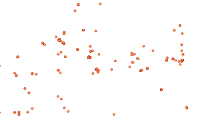

In [29]:
# Accessing items with content.get()
target_data = content_df.loc[target_index]
print(target_data.id)
target_content = gis.content.get(target_data.id)
target_content

For more information on using item ids, see this [community post](https://community.esri.com/t5/arcgis-online-blog/where-can-i-find-the-item-id-for-an-arcgis-online/ba-p/890284).

## Exporting Data

Pandas provides a convenient [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) method which can be used to generate zipped and unzipped csv outputs. Simply provide your target path with the appropriate file extension and call the method on the DataFrame object you would like to export.

In [30]:
# Exporting data to a csv
target_path = "org_content.csv"
content_df.to_csv(target_path)

In [31]:
# Exporting data to gzipped csv file
target_path_gzip = "org_content.csv.gz"
content_df.to_csv(target_path_gzip)

In [32]:
# Exporting data to zipped csv file
target_path_zip = "org_content.csv.zip"
content_df.to_csv(target_path_zip)

Pandas also provides additional methods for exporting the data as different file formats (e.g. [`to_json()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html), [`to_pickle()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html), [`to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)) which behave similarly.